In [1]:
import os
os.chdir('/home/shambhavi/Downloads/Odometer_Images__Stock_Photos_&_Vectors___Shutterstock') 

In [2]:
os.getcwd( )

'/home/shambhavi/Downloads/Odometer_Images__Stock_Photos_&_Vectors___Shutterstock'

In [25]:
import csv
from PIL import Image
f = open('/home/shambhavi/Downloads/Odometer_Images__Stock_Photos_&_Vectors___Shutterstock/Odometer-export.csv')
csv_f = csv.reader(f)

#iterate through rows of your CSV
for row in csv_f:

  R1 = float(row[1])
  R2 = float(row[2])
  R3 = float(row[3])
  R4 = float(row[4])

  #open image using PIL
  im = Image.open(row[0])

  crop_box = (R1, R2, R3, R4)

  crop_box = map(int, crop_box)

  im = im.crop((crop_box))
  

  im.save('/home/shambhavi/Downloads/Odometer_Images__Stock_Photos_&_Vectors___Shutterstock/Output/' + row[0] + '-cropped.jpg')


In [26]:
import pytesseract as pt 
import matplotlib.pyplot as plt

In [27]:
# path for the folder for getting the raw images 
path ="/home/shambhavi/Downloads/Odometer_Images__Stock_Photos_&_Vectors___Shutterstock/Output"
  
# link to the file in which output needs to be kept 
dstpath ="/home/shambhavi/Downloads/Odometer_Images__Stock_Photos_&_Vectors___Shutterstock/Output/Grayscale"


In [28]:
import cv2
from os import listdir,makedirs
from os.path import isfile,join

try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = [f for f in listdir(path) if isfile(join(path,f))] 

for image in files:

        img = cv2.imread(os.path.join(path,image))
        h, w, _ = img.shape
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        blurred = cv2.GaussianBlur(img, (5, 5), 0)

        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,1))

        close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)


        cnts = cv2.findContours(close, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        minimum_area = .75 * h * w
        cnts = [c for c in cnts if cv2.contourArea(c) < minimum_area]
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
        for c in cnts:
            x,y,w,h = cv2.boundingRect(c)
            ROI = 255 - img[y:y+h, x:x+w]
            cv2.rectangle(img, (x, y), (x + w, y + h), (36,255,12), 2)
            break
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,ROI)



AttributeError: 'NoneType' object has no attribute 'shape'

In [29]:
grayscale_images="/home/shambhavi/Downloads/Odometer_Images__Stock_Photos_&_Vectors___Shutterstock/Output/Grayscale"
Final_Result="/home/shambhavi/Downloads/Odometer_Images__Stock_Photos_&_Vectors___Shutterstock/Output/OutputFile.txt"

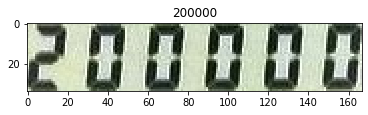

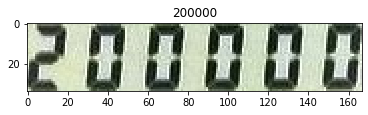

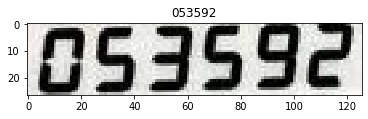

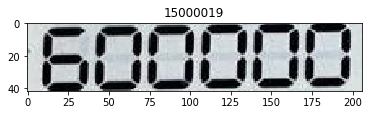

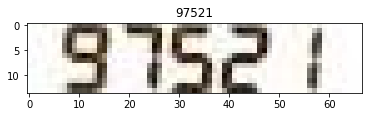

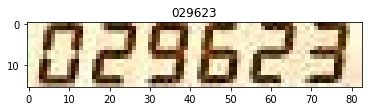

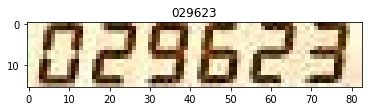

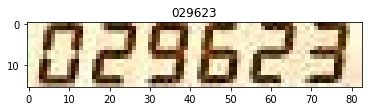

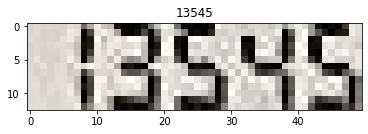

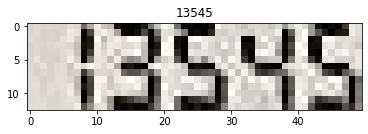

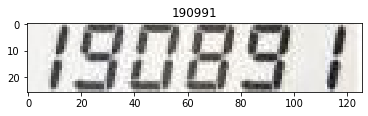

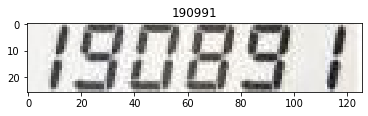

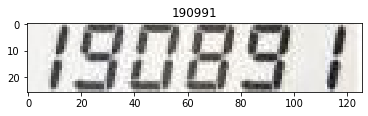

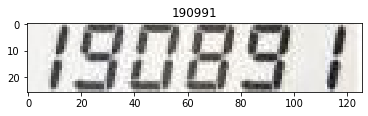

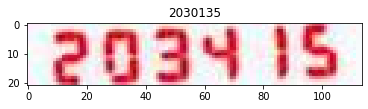

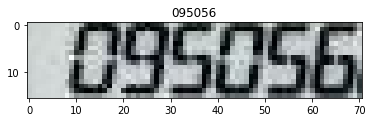

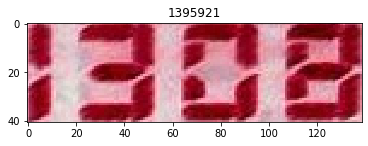

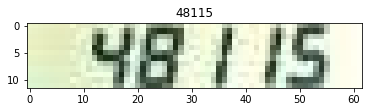

In [32]:
def display_image(image):
    plt.imshow(image)
    plt.show()

# iterating the images inside the folder 
for imageName in os.listdir(grayscale_images): 
        inputPath = os.path.join(grayscale_images, imageName) 
        img = Image.open(inputPath) 
  
        # applying ocr using pytesseract for python 
        # Page segmentation modes:
        #   0    Orientation and script detection (OSD) only.
        #   1    Automatic page segmentation with OSD.
        #   2    Automatic page segmentation, but no OSD, or OCR.
        #   3    Fully automatic page segmentation, but no OSD. (Default)
        #   4    Assume a single column of text of variable sizes.
        #   5    Assume a single uniform block of vertically aligned text.
        #   6    Assume a single uniform block of text.
        #   7    Treat the image as a single text line.
        #   8    Treat the image as a single word.
        #   9    Treat the image as a single word in a circle.
        #  10    Treat the image as a single character.
        #  11    Sparse text. Find as much text as possible in no particular order.
        #  12    Sparse text with OSD.
        #  13    Raw line. Treat the image as a single text line,
    
        text = pt.image_to_string(img,lang="eng1",config="--psm 13 --oem 0 -c tessedit_char_whitelist=0123456789")
        
        plt.imshow(img)
        plt.title(text)
        plt.show()  
      

